In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

In [4]:
adata_joanito = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.preprocessed.NanoMnT.ManualAnnot.h5ad')

In [6]:
dict_Identifier_to_lvl_1_CellType = dict()
dict_Identifier_to_lvl_2_CellType = dict()

In [7]:
adata_joanito_TME = adata_joanito[adata_joanito.obs['Manual_CellType_lvl_1']!='Tumor epithelial'].copy()
adata_joanito_TME = adata_joanito_TME.raw.to_adata()

In [9]:
sc.pp.normalize_total(adata_joanito_TME)
sc.pp.log1p(adata_joanito_TME)
sc.pp.highly_variable_genes(adata_joanito_TME, n_top_genes=2000, batch_key="SampleID")

adata_joanito_TME.raw = adata_joanito_TME.copy()
adata_joanito_TME = adata_joanito_TME[:, adata_joanito_TME.var.highly_variable]

In [10]:
sc.pp.scale(adata_joanito_TME, max_value=10)
sc.tl.pca(adata_joanito_TME, svd_solver="arpack")

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
sc.pp.neighbors(adata_joanito_TME, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata_joanito_TME, random_state=42)

2024-12-31 15:31:28.848735: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-31 15:31:28.850513: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 15:31:28.855111: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 15:31:28.870145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-31 15:31:28.893963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [13]:
sc.tl.leiden(adata_joanito_TME, resolution=0.1, key_added='leiden_res_0.1')
sc.tl.leiden(adata_joanito_TME, resolution=0.2, key_added='leiden_res_0.2')

/tmp/ipykernel_97257/761809209.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_joanito_TME, resolution=0.1, key_added='leiden_res_0.1')


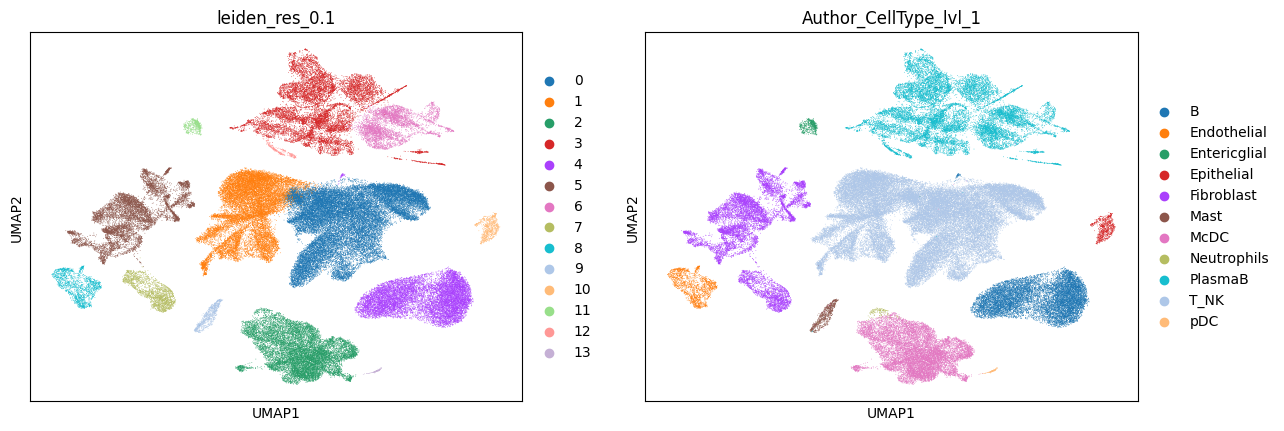

In [14]:
sc.pl.umap(adata_joanito_TME, color=['leiden_res_0.1', 'Author_CellType_lvl_1'])

In [ ]:
adata_joanito_TME.write('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/TME_annot_temp_files/Joanito.preprocessed.NanoMnT.nonTumor.preAnnot.h5ad')

In [3]:
adata_joanito_TME = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/TME_annot_temp_files/Joanito.preprocessed.NanoMnT.nonTumor.preAnnot.h5ad')

## B cells - leiden_res_0.1: 3,4,6

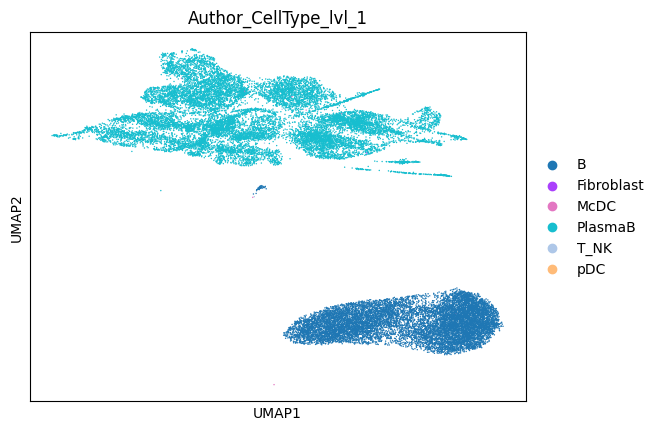

In [174]:
adata_joanito_TME_B = adata_joanito_TME[adata_joanito_TME.obs['leiden_res_0.1'].isin(['3', '4', '6',])].copy()
sc.pl.umap(adata_joanito_TME_B, color=['Author_CellType_lvl_1'])
adata_joanito_TME_B = adata_joanito_TME_B.raw.to_adata()

In [175]:
temp = list()
for SampleID, edf in adata_joanito_TME_B.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_B = adata_joanito_TME_B[~(adata_joanito_TME_B.obs['SampleID'].isin(temp))].copy()

/tmp/ipykernel_252326/2324023251.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_B.obs.groupby('SampleID'):


In [176]:
sc.pp.normalize_total(adata_joanito_TME_B)
sc.pp.log1p(adata_joanito_TME_B)
sc.pp.highly_variable_genes(adata_joanito_TME_B, n_top_genes=2000, batch_key="SampleID")

adata_joanito_TME_B.raw = adata_joanito_TME_B.copy()
adata_joanito_TME_B = adata_joanito_TME_B[:, adata_joanito_TME_B.var.highly_variable]

sc.pp.scale(adata_joanito_TME_B, max_value=10)
sc.tl.pca(adata_joanito_TME_B, svd_solver="arpack")

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [177]:
sc.pp.neighbors(adata_joanito_TME_B, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_B, random_state=42)

In [178]:
sc.tl.leiden(adata_joanito_TME_B, resolution=0.3, key_added='sub1_leiden',)

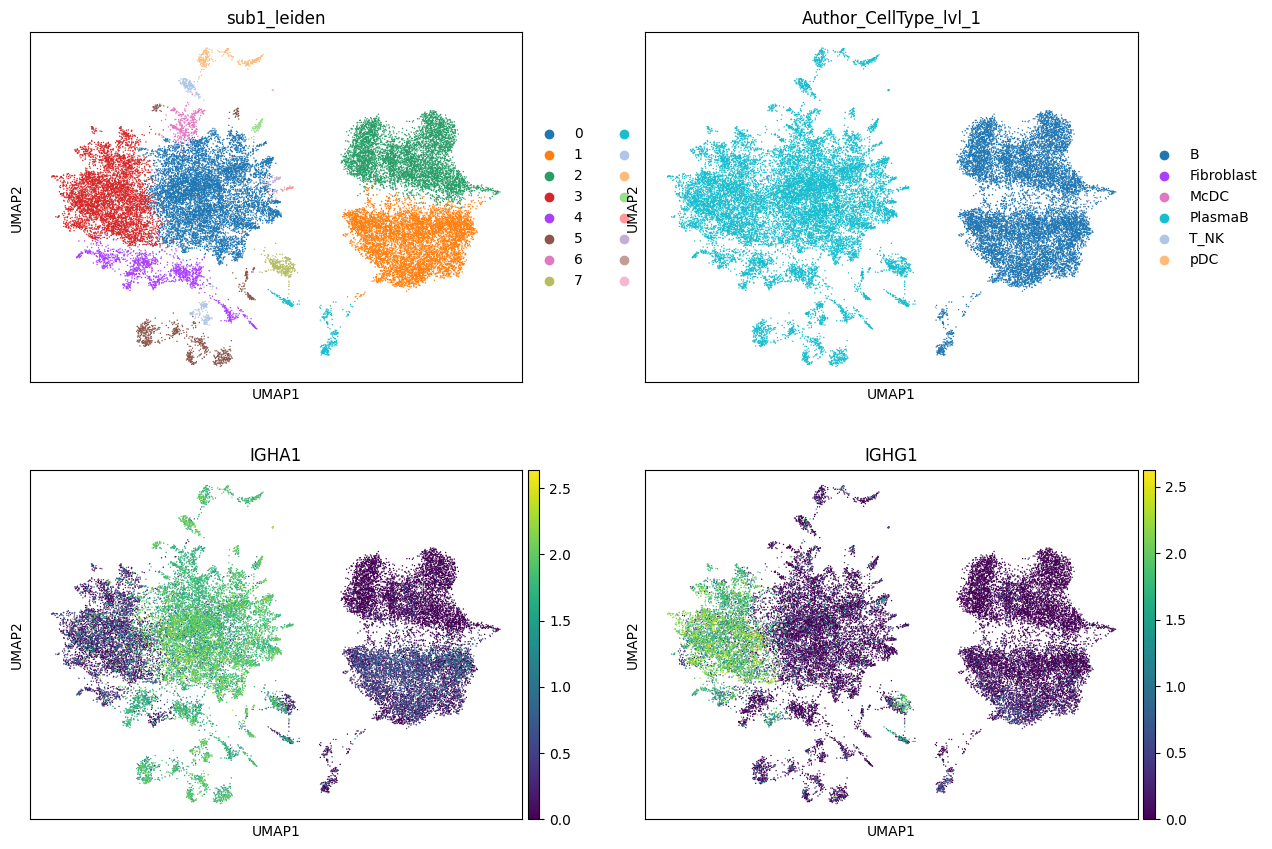

In [179]:
sc.pl.umap(adata_joanito_TME_B, 
           color=['sub1_leiden', 'Author_CellType_lvl_1', 
                  'IGHA1', 'IGHG1'], 
           ncols=2, )

### Plasma cells

In [180]:
adata_joanito_TME_B_Plasma = adata_joanito_TME_B[~(adata_joanito_TME_B.obs['sub1_leiden'].isin(['1', '2', '8']))].copy()
adata_joanito_TME_B_Plasma = adata_joanito_TME_B_Plasma.raw.to_adata()

In [181]:
sc.pp.normalize_total(adata_joanito_TME_B_Plasma)
sc.pp.log1p(adata_joanito_TME_B_Plasma)
sc.pp.highly_variable_genes(adata_joanito_TME_B_Plasma, n_top_genes=2000)

adata_joanito_TME_B_Plasma.raw = adata_joanito_TME_B_Plasma.copy()
adata_joanito_TME_B_Plasma = adata_joanito_TME_B_Plasma[:, adata_joanito_TME_B_Plasma.var.highly_variable]

sc.pp.scale(adata_joanito_TME_B_Plasma, max_value=10)
sc.tl.pca(adata_joanito_TME_B_Plasma, svd_solver="arpack")

sc.pp.neighbors(adata_joanito_TME_B_Plasma, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_B_Plasma, random_state=42)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [182]:
sc.tl.leiden(adata_joanito_TME_B_Plasma, resolution=0.5, key_added='sub2_leiden')

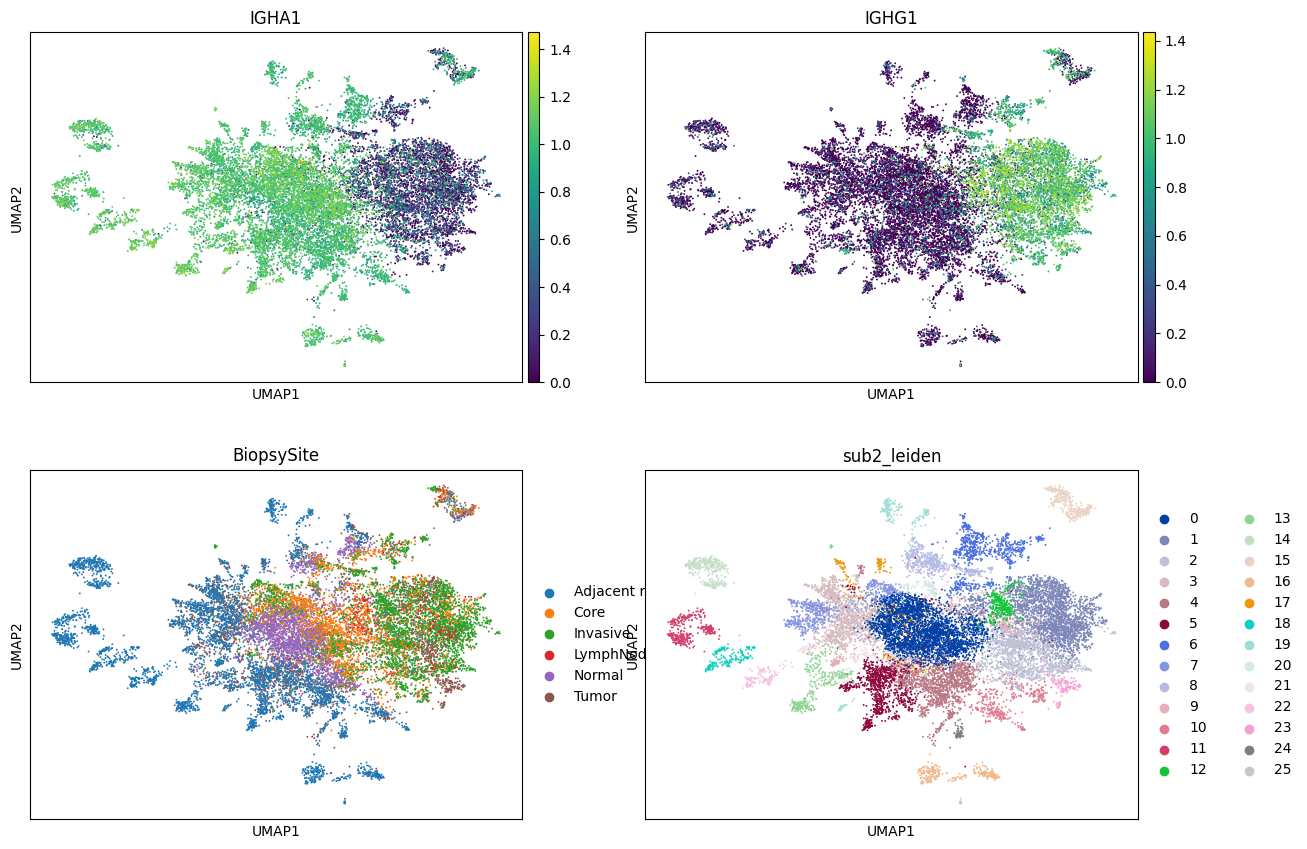

In [183]:
sc.pl.umap(adata_joanito_TME_B_Plasma, color=['IGHA1', 'IGHG1', 'BiopsySite', 'sub2_leiden',], ncols=2, )

In [184]:
# sc.tl.rank_genes_groups(adata_joanito_TME_B_Plasma, groupby='sub2_leiden', method='wilcoxon')
# # sc.pl.rank_genes_groups_dotplot(adata_joanito_TME_B_Plasma, n_genes=1, groupby='sub2_leiden', dendrogram=False)

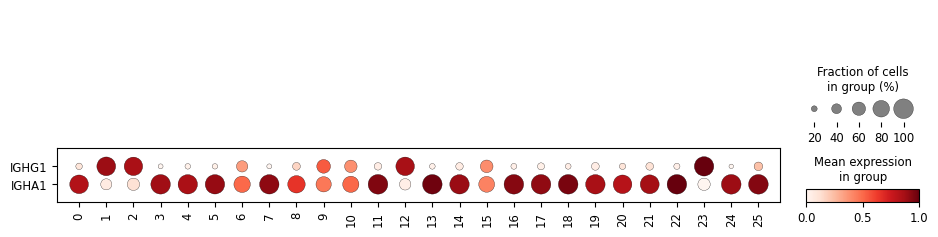

In [185]:
sc.pl.dotplot(adata_joanito_TME_B_Plasma, var_names=['IGHG1', 'IGHA1'], groupby='sub2_leiden', swap_axes=True, standard_scale='var')

#### leiden 6, 9, 10, 15 → Mixture of IGHG+ and IGHA+

In [186]:
adata_joanito_TME_B_Plasma_subset = adata_joanito_TME_B_Plasma[adata_joanito_TME_B_Plasma.obs['sub2_leiden'].isin(['6', '9', '10', '15'])].copy()
adata_joanito_TME_B_Plasma_subset = adata_joanito_TME_B_Plasma_subset.raw.to_adata()

temp = list()
for SampleID, edf in adata_joanito_TME_B_Plasma_subset.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_B_Plasma_subset = adata_joanito_TME_B_Plasma_subset[~(adata_joanito_TME_B_Plasma_subset.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_joanito_TME_B_Plasma_subset)
sc.pp.log1p(adata_joanito_TME_B_Plasma_subset)
sc.pp.highly_variable_genes(adata_joanito_TME_B_Plasma_subset, n_top_genes=2000, batch_key='SampleID')

adata_joanito_TME_B_Plasma_subset.raw = adata_joanito_TME_B_Plasma_subset.copy()
adata_joanito_TME_B_Plasma_subset = adata_joanito_TME_B_Plasma_subset[:, adata_joanito_TME_B_Plasma_subset.var.highly_variable]

sc.pp.scale(adata_joanito_TME_B_Plasma_subset, max_value=10)
sc.tl.pca(adata_joanito_TME_B_Plasma_subset, svd_solver="arpack")

sc.pp.neighbors(adata_joanito_TME_B_Plasma_subset, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_B_Plasma_subset, random_state=42)

sc.tl.leiden(adata_joanito_TME_B_Plasma_subset, resolution=0.3, key_added='sub3_leiden')

/tmp/ipykernel_252326/3013250759.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_B_Plasma_subset.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


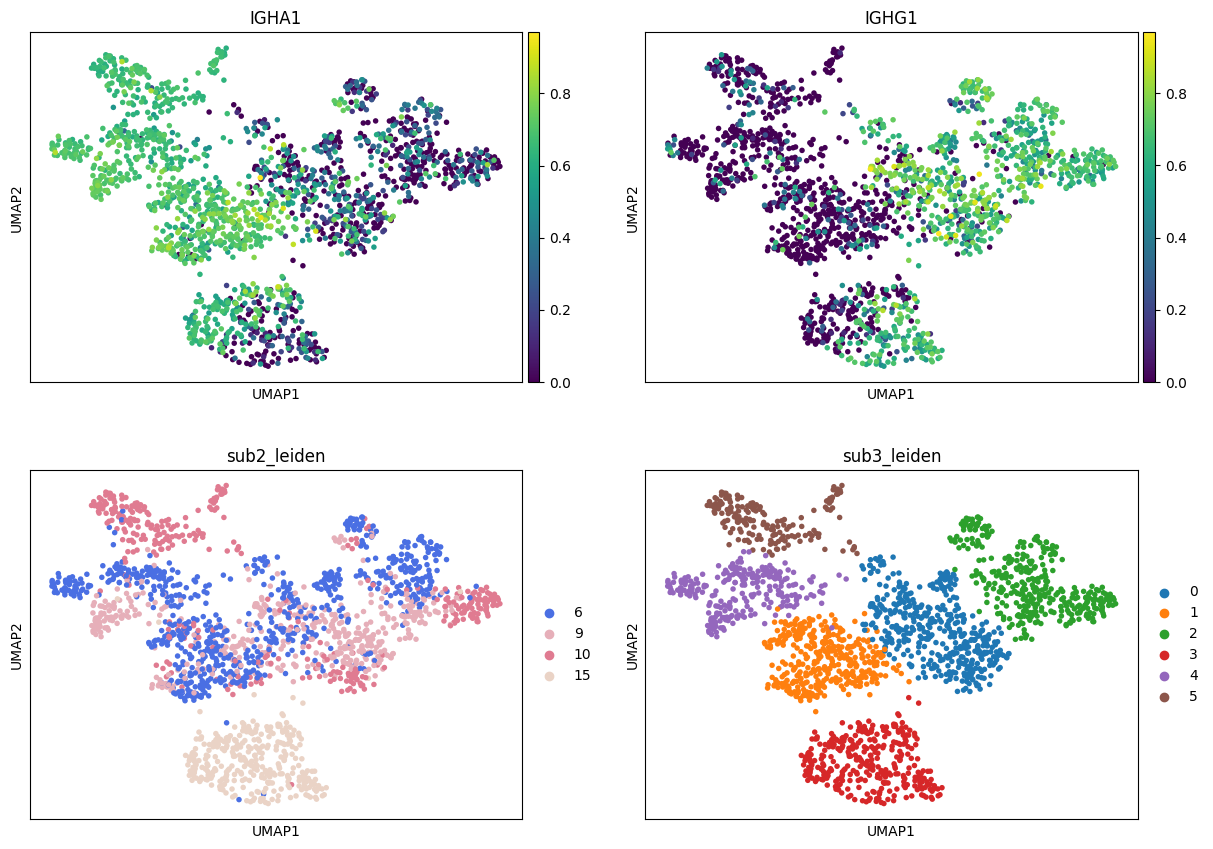

In [187]:
sc.pl.umap(adata_joanito_TME_B_Plasma_subset, color=['IGHA1', 'IGHG1', 'sub2_leiden', 'sub3_leiden'], ncols=2)

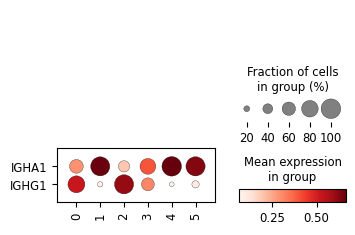

In [188]:
sc.pl.dotplot(adata_joanito_TME_B_Plasma_subset, var_names=['IGHA1', 'IGHG1',], groupby='sub3_leiden', swap_axes=True)

##### sub3_leiden 0 → Mixture of IGHA+ and IGHG+ Plasma (Unresolvable)

In [189]:
adata_joanito_TME_B_Plasma_subset_l0 = adata_joanito_TME_B_Plasma_subset[adata_joanito_TME_B_Plasma_subset.obs['sub3_leiden'].isin(['0',])].copy()
adata_joanito_TME_B_Plasma_subset_l0 = adata_joanito_TME_B_Plasma_subset_l0.raw.to_adata()

temp = list()
for SampleID, edf in adata_joanito_TME_B_Plasma_subset_l0.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_B_Plasma_subset_l0 = adata_joanito_TME_B_Plasma_subset_l0[~(adata_joanito_TME_B_Plasma_subset_l0.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_joanito_TME_B_Plasma_subset_l0)
sc.pp.log1p(adata_joanito_TME_B_Plasma_subset_l0)
sc.pp.highly_variable_genes(adata_joanito_TME_B_Plasma_subset_l0, n_top_genes=2000, batch_key='SampleID')

adata_joanito_TME_B_Plasma_subset_l0.raw = adata_joanito_TME_B_Plasma_subset_l0.copy()
adata_joanito_TME_B_Plasma_subset_l0 = adata_joanito_TME_B_Plasma_subset_l0[:, adata_joanito_TME_B_Plasma_subset_l0.var.highly_variable]

sc.pp.scale(adata_joanito_TME_B_Plasma_subset_l0, max_value=10)
sc.tl.pca(adata_joanito_TME_B_Plasma_subset_l0, svd_solver="arpack")

sc.pp.neighbors(adata_joanito_TME_B_Plasma_subset_l0, n_neighbors=5, n_pcs=40)
sc.tl.umap(adata_joanito_TME_B_Plasma_subset_l0, random_state=42)

sc.tl.leiden(adata_joanito_TME_B_Plasma_subset_l0, resolution=1.0, key_added='sub4_leiden')

/tmp/ipykernel_252326/2120722878.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_B_Plasma_subset_l0.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normal

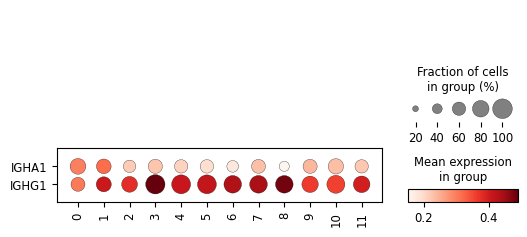

In [190]:
sc.pl.dotplot(adata_joanito_TME_B_Plasma_subset_l0, var_names=['IGHA1', 'IGHG1',], groupby='sub4_leiden', swap_axes=True)

In [191]:
for tup in adata_joanito_TME_B_Plasma_subset_l0[(adata_joanito_TME_B_Plasma_subset_l0.obs['sub4_leiden'].isin(['8',]))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'
    
for tup in adata_joanito_TME_B_Plasma_subset_l0[~(adata_joanito_TME_B_Plasma_subset_l0.obs['sub4_leiden'].isin(['8']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

##### sub3_leiden 3 → Mixture of IGHA+ and IGHG+ Plasma

In [192]:
adata_joanito_TME_B_Plasma_subset_l3 = adata_joanito_TME_B_Plasma_subset[adata_joanito_TME_B_Plasma_subset.obs['sub3_leiden'].isin(['3',])].copy()
adata_joanito_TME_B_Plasma_subset_l3 = adata_joanito_TME_B_Plasma_subset_l3.raw.to_adata()

temp = list()
for SampleID, edf in adata_joanito_TME_B_Plasma_subset_l3.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_B_Plasma_subset_l3 = adata_joanito_TME_B_Plasma_subset_l3[~(adata_joanito_TME_B_Plasma_subset_l3.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_joanito_TME_B_Plasma_subset_l3)
sc.pp.log1p(adata_joanito_TME_B_Plasma_subset_l3)
sc.pp.highly_variable_genes(adata_joanito_TME_B_Plasma_subset_l3, n_top_genes=2000, batch_key='SampleID')

adata_joanito_TME_B_Plasma_subset_l3.raw = adata_joanito_TME_B_Plasma_subset_l3.copy()
adata_joanito_TME_B_Plasma_subset_l3 = adata_joanito_TME_B_Plasma_subset_l3[:, adata_joanito_TME_B_Plasma_subset_l3.var.highly_variable]

sc.pp.scale(adata_joanito_TME_B_Plasma_subset_l3, max_value=10)
sc.tl.pca(adata_joanito_TME_B_Plasma_subset_l3, svd_solver="arpack")

sc.pp.neighbors(adata_joanito_TME_B_Plasma_subset_l3, n_neighbors=5, n_pcs=40)
sc.tl.umap(adata_joanito_TME_B_Plasma_subset_l3, random_state=42)

sc.tl.leiden(adata_joanito_TME_B_Plasma_subset_l3, resolution=1.0, key_added='sub4_leiden')

/tmp/ipykernel_252326/2866865519.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_B_Plasma_subset_l3.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


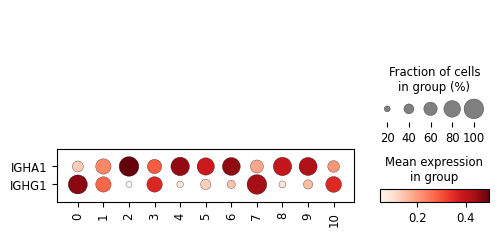

In [193]:
sc.pl.dotplot(adata_joanito_TME_B_Plasma_subset_l3, var_names=['IGHA1', 'IGHG1',], groupby='sub4_leiden', swap_axes=True)

In [194]:
for tup in adata_joanito_TME_B_Plasma_subset_l3[(adata_joanito_TME_B_Plasma_subset_l3.obs['sub4_leiden'].isin(['0', '7',]))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'
    
for tup in adata_joanito_TME_B_Plasma_subset_l3[(adata_joanito_TME_B_Plasma_subset_l3.obs['sub4_leiden'].isin(['2', '4', '5', '6', '8', '9']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHA+ Plasma'
    
for tup in adata_joanito_TME_B_Plasma_subset_l3[(adata_joanito_TME_B_Plasma_subset_l3.obs['sub4_leiden'].isin(['1', '3', '10']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

##### other leidens

In [195]:
for tup in adata_joanito_TME_B_Plasma_subset[(adata_joanito_TME_B_Plasma_subset.obs['sub3_leiden'].isin(['1', '4', '5']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHA+ Plasma'
    
for tup in adata_joanito_TME_B_Plasma_subset[(adata_joanito_TME_B_Plasma_subset.obs['sub3_leiden'].isin(['2']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'

#### leiden 1, 2, 12, 23 → IGHG+

In [196]:
for tup in adata_joanito_TME_B_Plasma[adata_joanito_TME_B_Plasma.obs['sub2_leiden'].isin(['1', '2', '12', '23'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'

#### leiden 0, 3, 4, 5, 7, 8, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25 → IGHA+

In [197]:
for tup in adata_joanito_TME_B_Plasma[~(adata_joanito_TME_B_Plasma.obs['sub2_leiden'].isin(['1', '2', '6', '9', '10', '12', '15', '23']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHA+ Plasma'

#### Label results

In [198]:
adata_joanito_TME_B_Plasma.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType[ID] for ID in adata_joanito_TME_B_Plasma.obs['Identifier'] ]
adata_joanito_TME_B_Plasma.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType[ID] for ID in adata_joanito_TME_B_Plasma.obs['Identifier'] ]

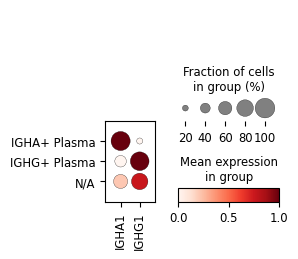

In [199]:
sc.pl.dotplot(adata_joanito_TME_B_Plasma, var_names=['IGHA1', 'IGHG1'], groupby='Manual_CellType_lvl_2', standard_scale='var')

### B cells (exclude variable IG genes)

In [220]:
adata_joanito_TME_B_B = adata_joanito_TME_B[(adata_joanito_TME_B.obs['sub1_leiden'].isin(['1', '2', '8']))].copy()
adata_joanito_TME_B_B = adata_joanito_TME_B_B.raw.to_adata()

In [221]:
IGK_gene = list()
for gene in adata_joanito_TME_B_B.var.index:
    if ('IGKV' == gene[:4]) or ('IGLV' == gene[:4]) or ('IGHV' == gene[:4]):
        IGK_gene.append(gene)
        
adata_joanito_TME_B_B = adata_joanito_TME_B_B[:, ~(adata_joanito_TME_B_B.var.index.isin( IGK_gene ))]

In [222]:
sc.pp.normalize_total(adata_joanito_TME_B_B)
sc.pp.log1p(adata_joanito_TME_B_B)
sc.pp.highly_variable_genes(adata_joanito_TME_B_B, n_top_genes=2000)

adata_joanito_TME_B_B.raw = adata_joanito_TME_B_B.copy()
adata_joanito_TME_B_B = adata_joanito_TME_B_B[:, adata_joanito_TME_B_B.var.highly_variable]

sc.pp.scale(adata_joanito_TME_B_B, max_value=10)
sc.tl.pca(adata_joanito_TME_B_B, svd_solver="arpack")

sc.pp.neighbors(adata_joanito_TME_B_B, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_B_B, random_state=42)

sc.tl.leiden(adata_joanito_TME_B_B, resolution=0.5, key_added='sub2_leiden')

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


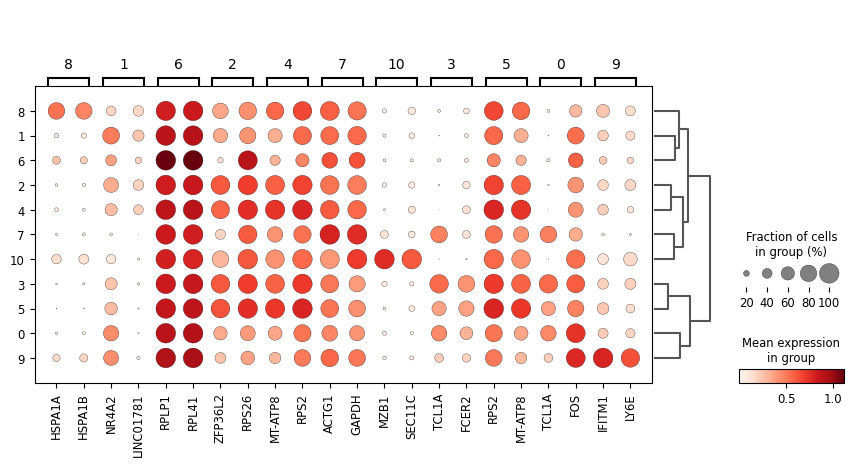

In [223]:
sc.tl.rank_genes_groups(adata_joanito_TME_B_B, groupby='sub2_leiden')
sc.pl.rank_genes_groups_dotplot(adata_joanito_TME_B_B, groupby='sub2_leiden', n_genes=2)

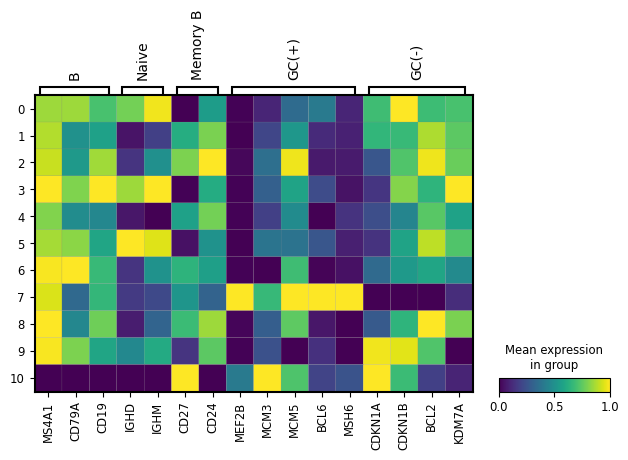

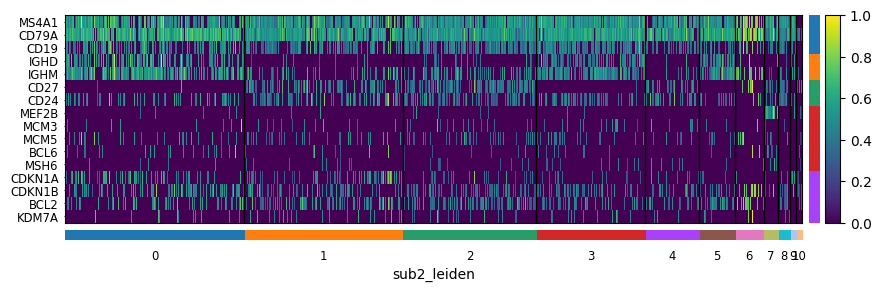

In [224]:
# https://pmc.ncbi.nlm.nih.gov/articles/PMC6813733/#:~:text=Na%C3%AFve%20B%20Cells%20(N%3A%20Canonical,levels%20than%20in%20transitional%20cells.
    # Transitional B Cells (T; Canonical Phenotype: CD19+, IgDlo/+, CD27–, CD24++, CD38++)
    # Naïve B Cells (N: Canonical Phenotype: CD19+, IgD+, CD27–, CD38+/–, CD24+/–)
    # Memory B Cells (M; Canonical Phenotype: CD19+, CD27+, CD38+/–, CD24+/–)

# GC: https://www.sciencedirect.com/science/article/pii/S1535610818303660?via%3Dihub

B_markers = { 'B' : ['MS4A1', 'CD79A', 'CD19'], 
            'Naive' : ["IGHD", 'IGHM', ],
            'Memory B' : ['CD27', 'CD24'], 
            # 'Activated B' : ['IGHA1', 'IGHG1', ],
            'GC(+)' : ['MEF2B', 'MCM3', 'MCM5', 'BCL6', 'MSH6', ], 
            'GC(-)' : ['CDKN1A', 'CDKN1B', 'BCL2', 'KDM7A'],  # BCL2 is negative marker
}


sc.pl.matrixplot(adata_joanito_TME_B_B, var_names=B_markers, 
              groupby='sub2_leiden', 
              standard_scale='var',
              )
sc.pl.heatmap(adata_joanito_TME_B_B, var_names=B_markers, 
              groupby='sub2_leiden', 
              standard_scale='var', swap_axes=True,
              )

#### leiden 0, 3, 5 → Naive B

In [225]:
for tup in adata_joanito_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['0', '3', '5',]:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Naive B'

#### leiden 1, 2, 4, 8 → Memory B

In [226]:
for tup in adata_joanito_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['1', '2', '4', '8']:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Memory B'

#### leiden 7 → GC B

In [236]:
for tup in adata_joanito_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['7']:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'GC B'

#### leiden 6, 9, 10 → N/A

In [227]:
for tup in adata_joanito_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['6', '9', '10']:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

#### Label results

In [237]:
adata_joanito_TME_B_B.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType[ID] for ID in adata_joanito_TME_B_B.obs['Identifier'] ]
adata_joanito_TME_B_B.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType[ID] for ID in adata_joanito_TME_B_B.obs['Identifier'] ]

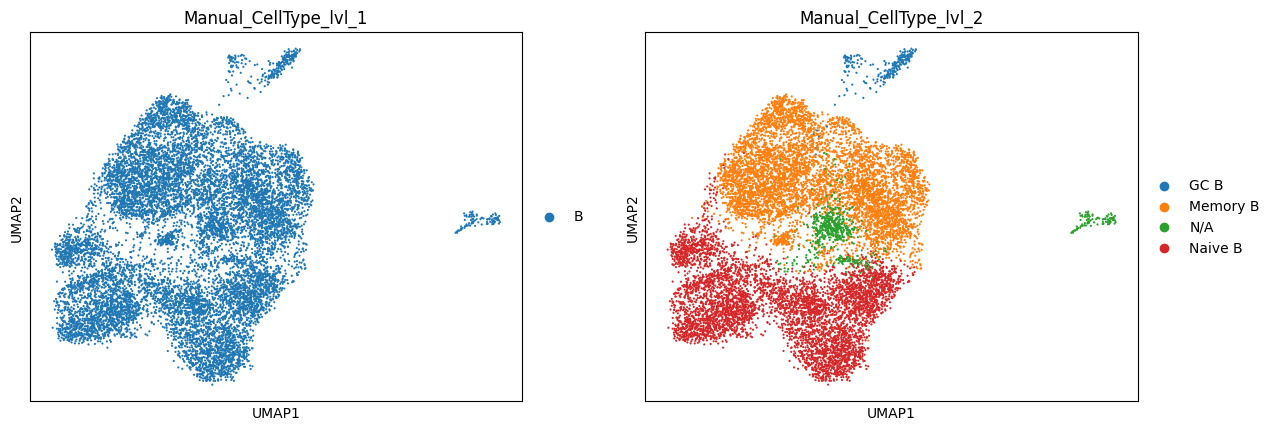

In [238]:
sc.pl.umap(adata_joanito_TME_B_B, color=['Manual_CellType_lvl_1', 'Manual_CellType_lvl_2'])

### Overview of B cell results

In [240]:
adata_joanito_TME_B.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType[Identifier] for Identifier in adata_joanito_TME_B.obs['Identifier'] ]
adata_joanito_TME_B.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType[Identifier] for Identifier in adata_joanito_TME_B.obs['Identifier'] ]

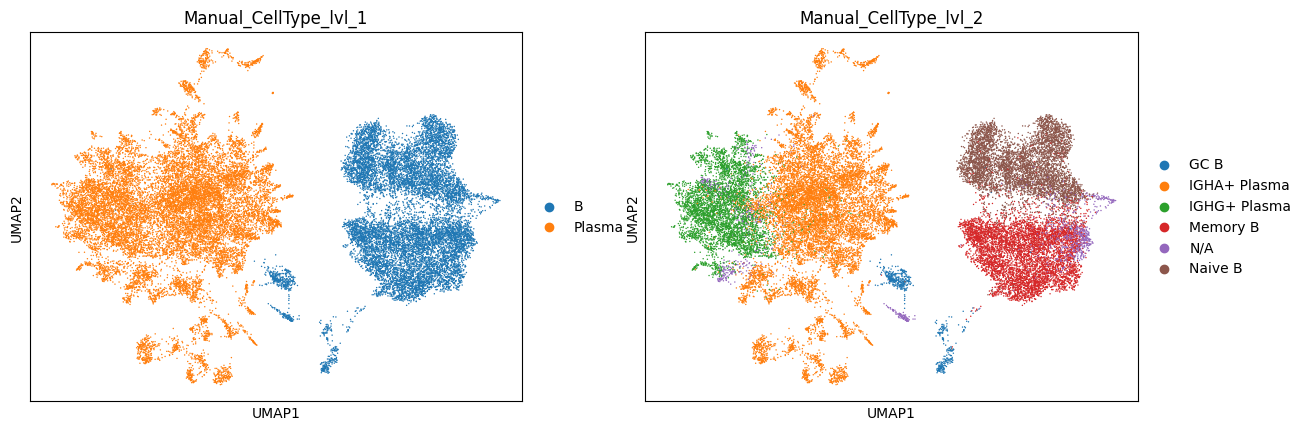

In [241]:
sc.pl.umap(adata_joanito_TME_B, color=['Manual_CellType_lvl_1', 'Manual_CellType_lvl_2'])

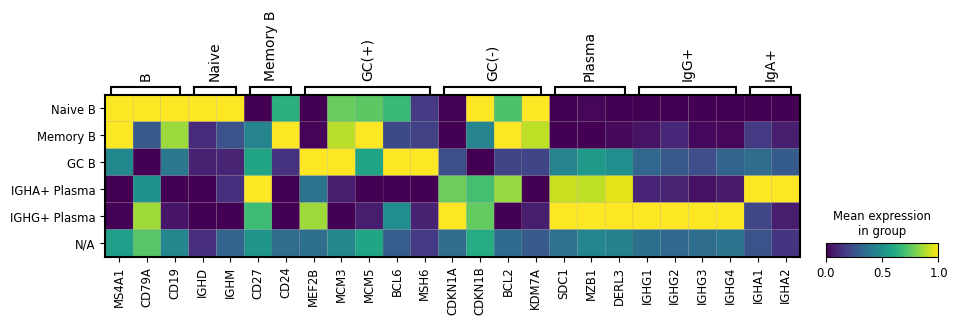

In [242]:
B_markers_total = dict()
Plasma_markers = {
    'Plasma' : ['SDC1', 'MZB1', 'DERL3'],
}

for k,v in B_markers.items(): B_markers_total[k] = v
for k,v in Plasma_markers.items(): B_markers_total[k] = v
B_markers_total['IgG+'] = [ 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4' ]
B_markers_total['IgA+'] = [ 'IGHA1', 'IGHA2',  ]

sc.pl.matrixplot(adata_joanito_TME_B, var_names=B_markers_total, groupby='Manual_CellType_lvl_2', standard_scale='var', 
                 categories_order=['Naive B', 'Memory B', 'GC B', 'IGHA+ Plasma', 'IGHG+ Plasma', 'N/A'])

## B cells - leiden res_0.1: 12

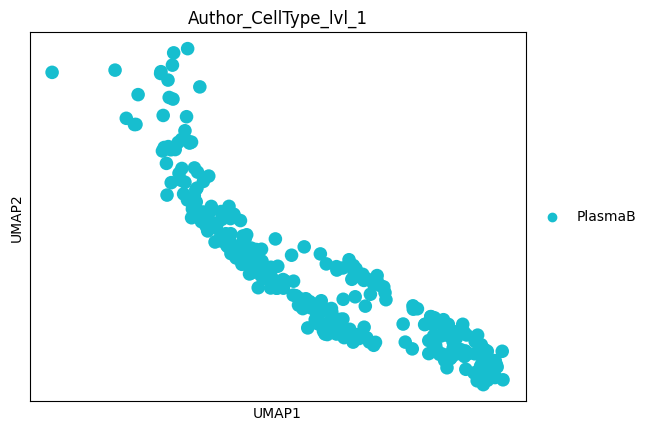

In [243]:
adata_joanito_TME_B_2 = adata_joanito_TME[adata_joanito_TME.obs['leiden_res_0.1'].isin(['12'])].copy()
sc.pl.umap(adata_joanito_TME_B_2, color=['Author_CellType_lvl_1'], )
adata_joanito_TME_B_2 = adata_joanito_TME_B_2.raw.to_adata()

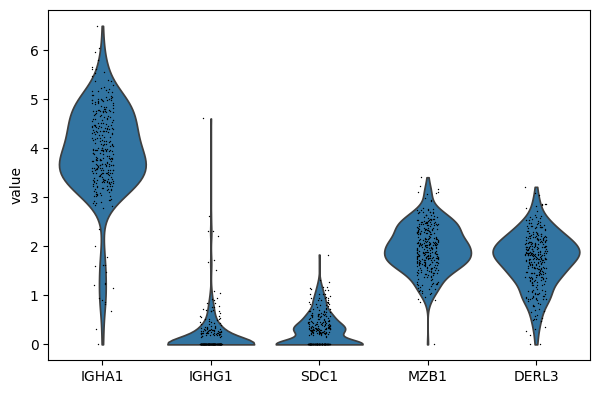

In [245]:
sc.pl.violin(adata_joanito_TME_B_2, keys=['IGHA1', 'IGHG1', 'SDC1', 'MZB1', 'DERL3'])

In [246]:
for Identifier in adata_joanito_TME_B_2.obs['Identifier']:
    dict_Identifier_to_lvl_1_CellType[Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[Identifier] = 'IGHA+ Plasma'

## T&NK cells - leiden_res_0.1: 0, 1

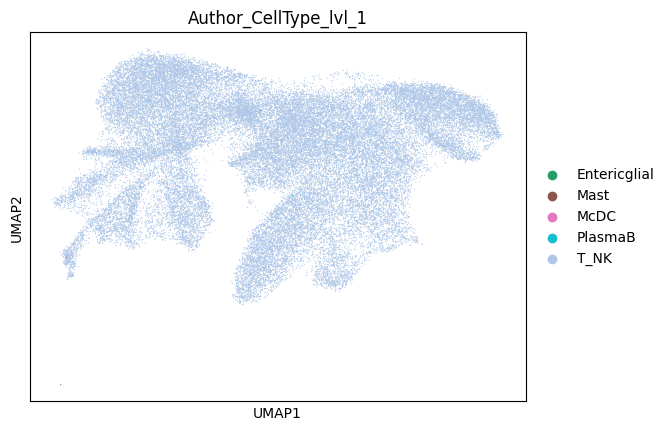

In [247]:
adata_joanito_TME_T_NK = adata_joanito_TME[adata_joanito_TME.obs['leiden_res_0.1'].isin(['0', '1'])].copy()
sc.pl.umap(adata_joanito_TME_T_NK, color=['Author_CellType_lvl_1'])
adata_joanito_TME_T_NK = adata_joanito_TME_T_NK.raw.to_adata()

In [248]:
temp = list()
for SampleID, edf in adata_joanito_TME_T_NK.obs.groupby('SampleID'):
    if len(edf) <= 1:
        print(SampleID)
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'N/A'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_T_NK = adata_joanito_TME_T_NK[~(adata_joanito_TME_T_NK.obs['SampleID'].isin(temp))].copy()

/tmp/ipykernel_252326/611135710.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_T_NK.obs.groupby('SampleID'):


EXT126


In [249]:
sc.pp.normalize_total(adata_joanito_TME_T_NK)
sc.pp.log1p(adata_joanito_TME_T_NK)
sc.pp.highly_variable_genes(adata_joanito_TME_T_NK, n_top_genes=2000, batch_key='SampleID')

adata_joanito_TME_T_NK.raw = adata_joanito_TME_T_NK.copy()
adata_joanito_TME_T_NK = adata_joanito_TME_T_NK[:, adata_joanito_TME_T_NK.var.highly_variable]

sc.pp.scale(adata_joanito_TME_T_NK, max_value=10)
sc.tl.pca(adata_joanito_TME_T_NK, svd_solver="arpack")

sc.pp.neighbors(adata_joanito_TME_T_NK, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_T_NK, random_state=42)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [250]:
sc.tl.leiden(adata_joanito_TME_T_NK, resolution=0.2, key_added='sub1_leiden')

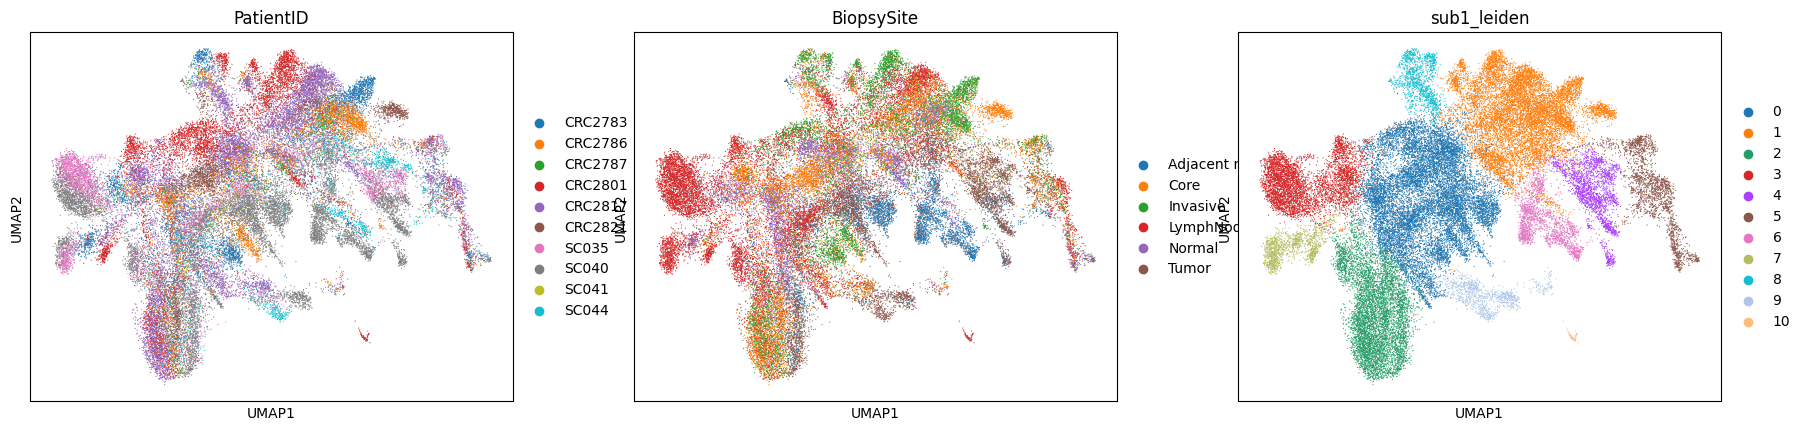

In [251]:
sc.pl.umap(adata_joanito_TME_T_NK, color=['PatientID', 'BiopsySite', 'sub1_leiden'])

In [252]:
T_markers = {
    'T' : ['CD3D', 'CD3E', ],
    'Naive T(+)' : ['PTPRC', 'IL7R', 'CCR7', 'FOXP1', 'SELL',],
    'Naive T(-)' : ['IFNG'],
    'CD4 T' : ['TRAC', 'CD4', 'FOXP3'], 
    'CD8 T' : ['CD8A', 'CD8B', 'GZMK'],
    'NK' : ['NCAM1', 'KLRD1', 'NKG7'],
    'GD T' : ['TRDV1', 'TRDV2', 'TRDV3'],
    'ILC3' : ['RORC', 'IL7R', 'CCR6', 'KIT',],
}

<Axes: xlabel='sub1_leiden', ylabel='count'>

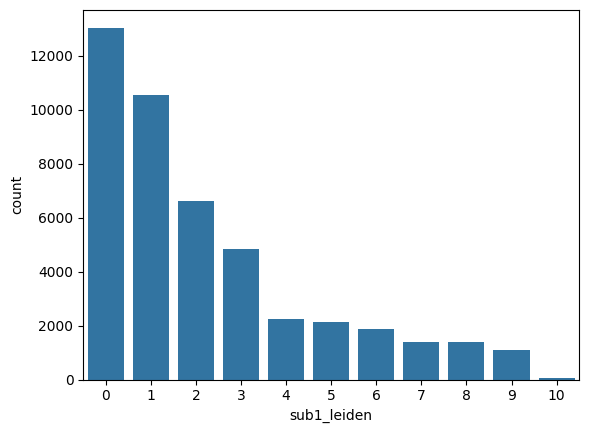

In [253]:
sns.countplot(x=adata_joanito_TME_T_NK.obs['sub1_leiden'])

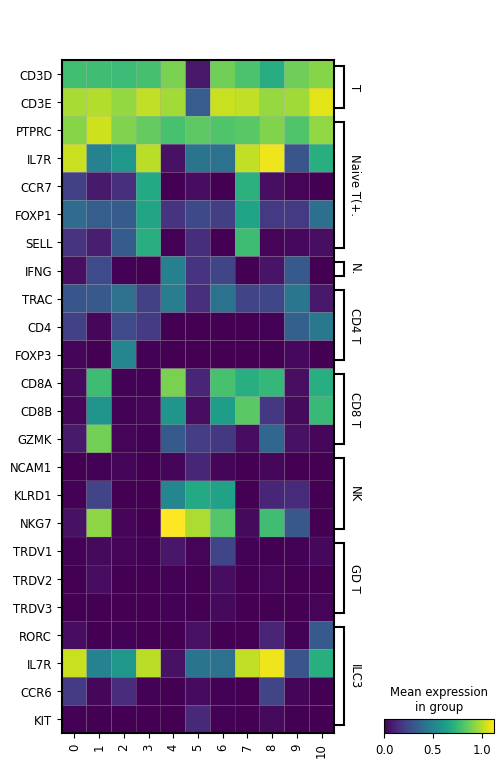

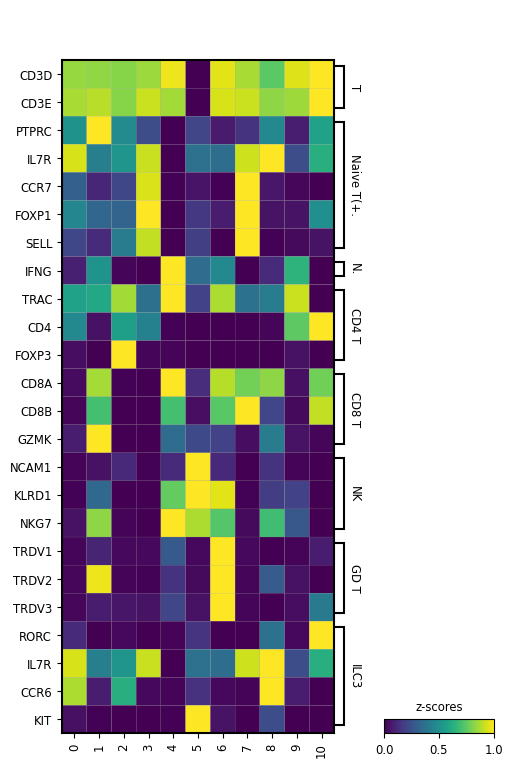

In [254]:
sc.pl.matrixplot(adata_joanito_TME_T_NK, var_names=T_markers, groupby='sub1_leiden', swap_axes=True,)
sc.pl.matrixplot(adata_joanito_TME_T_NK, var_names=T_markers, groupby='sub1_leiden', swap_axes=True, standard_scale='var', colorbar_title='z-scores')

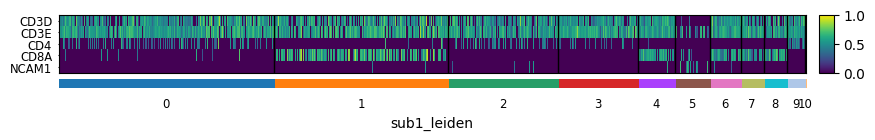

In [255]:
sc.pl.heatmap(adata_joanito_TME_T_NK, var_names=['CD3D', 'CD3E', 'CD4', 'CD8A', 'NCAM1'], groupby='sub1_leiden', swap_axes=True, standard_scale='var')

### leiden 0, 2, 3, 9 → CD4+ T

In [256]:
for tup in adata_joanito_TME_T_NK[adata_joanito_TME_T_NK.obs['sub1_leiden'].isin(['0', '2', '3', '9'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD4+ T'

### leiden 4, 7, 8 → CD8+ T

In [257]:
for tup in adata_joanito_TME_T_NK[adata_joanito_TME_T_NK.obs['sub1_leiden'].isin(['4', '7', '8'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'

### leiden 5 → Mixture of NK and T cells

In [258]:
# for tup in adata_joanito_TME_T_NK[adata_joanito_TME_T_NK.obs['sub1_leiden'].isin(['5'])].obs.itertuples():
#     dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'NK'
#     dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'NK'

In [259]:
adata_joanito_TME_T_NK_l5 = adata_joanito_TME_T_NK[adata_joanito_TME_T_NK.obs['sub1_leiden'].isin(['5'])].copy()
adata_joanito_TME_T_NK_l5 = adata_joanito_TME_T_NK_l5.raw.to_adata()

temp = list()
for SampleID, edf in adata_joanito_TME_T_NK_l5.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'N/A'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_T_NK_l5 = adata_joanito_TME_T_NK_l5[~(adata_joanito_TME_T_NK_l5.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_joanito_TME_T_NK_l5)
sc.pp.log1p(adata_joanito_TME_T_NK_l5)
sc.pp.highly_variable_genes(adata_joanito_TME_T_NK_l5, n_top_genes=1000, batch_key='SampleID')

adata_joanito_TME_T_NK_l5.raw = adata_joanito_TME_T_NK_l5.copy()
adata_joanito_TME_T_NK_l5 = adata_joanito_TME_T_NK_l5[:, adata_joanito_TME_T_NK_l5.var.highly_variable]

sc.pp.scale(adata_joanito_TME_T_NK_l5, max_value=10)
sc.tl.pca(adata_joanito_TME_T_NK_l5, svd_solver="arpack")

sc.pp.neighbors(adata_joanito_TME_T_NK_l5, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_T_NK_l5, random_state=42)
sc.tl.leiden(adata_joanito_TME_T_NK_l5, resolution=0.5, key_added='sub2_leiden')

/tmp/ipykernel_252326/1577816672.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_T_NK_l5.obs.groupby('SampleID'):


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


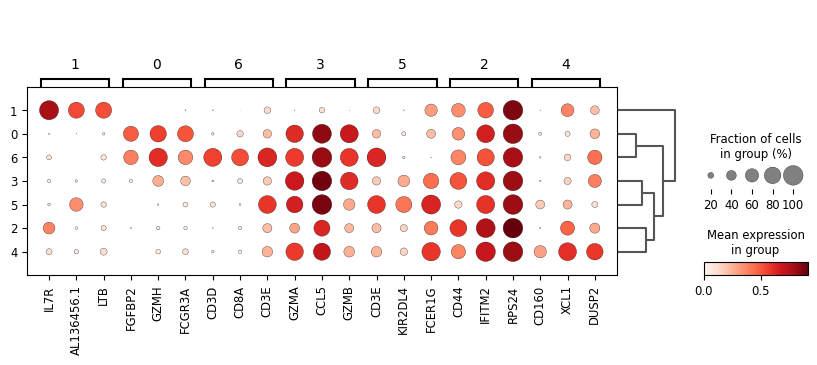

In [260]:
sc.tl.rank_genes_groups(adata_joanito_TME_T_NK_l5, groupby='sub2_leiden', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_joanito_TME_T_NK_l5, groupby='sub2_leiden', n_genes=3)

In [261]:
for ct, genes in T_markers.items():
    sc.tl.score_genes(adata_joanito_TME_T_NK_l5, genes, score_name=f'{ct}')

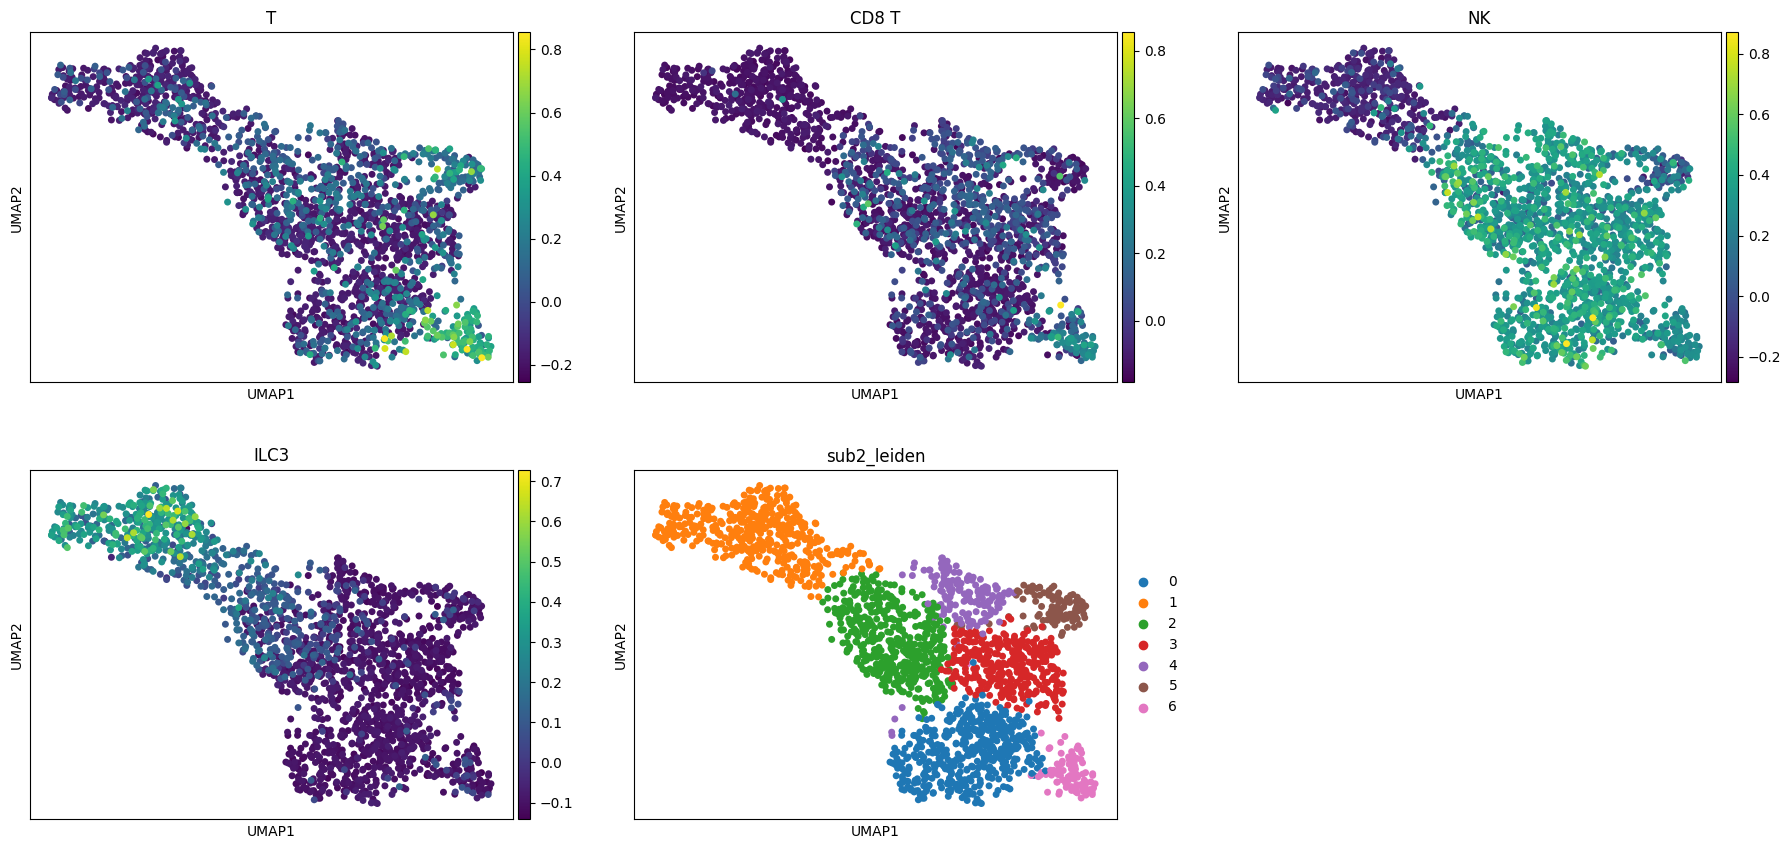

In [262]:
sc.pl.umap(adata_joanito_TME_T_NK_l5, color=['T', 'CD8 T', 'NK', 'ILC3', 'sub2_leiden'], ncols=3, s=100)

#### sub2_leiden 1 → ILC3

In [263]:
for tup in adata_joanito_TME_T_NK_l5[adata_joanito_TME_T_NK_l5.obs['sub2_leiden'].isin(['1'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'ILC3'

#### sub2_leiden 6 → CD8+ T

In [264]:
for tup in adata_joanito_TME_T_NK_l5[adata_joanito_TME_T_NK_l5.obs['sub2_leiden'].isin(['6'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'

#### All other sub2_leidens → NK

In [283]:
for tup in adata_joanito_TME_T_NK_l5[~(adata_joanito_TME_T_NK_l5.obs['sub2_leiden'].isin(['1', '6']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'NK'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'NK'

### leiden 1, 6 → Mixture of ab and gd CD8+ T

In [266]:
adata_joanito_TME_T_NK_subset = adata_joanito_TME_T_NK[adata_joanito_TME_T_NK.obs['sub1_leiden'].isin(['1', '6'])].copy()
adata_joanito_TME_T_NK_subset = adata_joanito_TME_T_NK_subset.raw.to_adata()

temp = list()
for SampleID, edf in adata_joanito_TME_T_NK_subset.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'T'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_T_NK_subset = adata_joanito_TME_T_NK_subset[~(adata_joanito_TME_T_NK_subset.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_joanito_TME_T_NK_subset)
sc.pp.log1p(adata_joanito_TME_T_NK_subset)
sc.pp.highly_variable_genes(adata_joanito_TME_T_NK_subset, n_top_genes=2000, batch_key='SampleID')

adata_joanito_TME_T_NK_subset.raw = adata_joanito_TME_T_NK_subset.copy()
adata_joanito_TME_T_NK_subset = adata_joanito_TME_T_NK_subset[:, adata_joanito_TME_T_NK_subset.var.highly_variable]

sc.pp.scale(adata_joanito_TME_T_NK_subset, max_value=10)
sc.tl.pca(adata_joanito_TME_T_NK_subset, svd_solver="arpack")

/tmp/ipykernel_252326/3584048734.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_T_NK_subset.obs.groupby('SampleID'):


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [267]:
sc.pp.neighbors(adata_joanito_TME_T_NK_subset, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_T_NK_subset, random_state=42)
sc.tl.leiden(adata_joanito_TME_T_NK_subset, resolution=0.5, key_added='sub2_leiden')

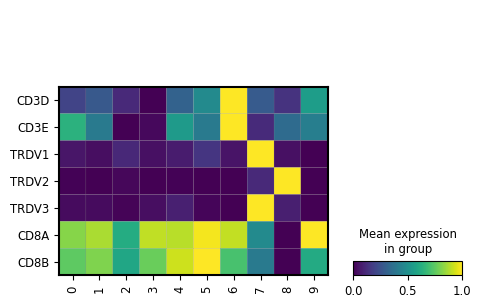

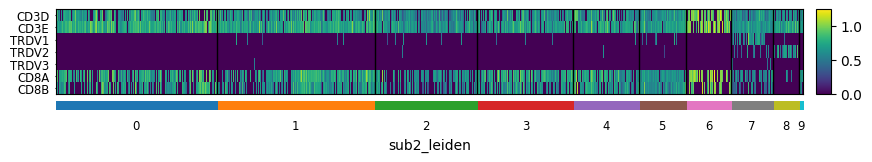

In [268]:
sc.pl.matrixplot( adata_joanito_TME_T_NK_subset, groupby='sub2_leiden', var_names=['CD3D', 'CD3E', 'TRDV1', 'TRDV2', 'TRDV3', 'CD8A', 'CD8B',], swap_axes=True, standard_scale='var')
sc.pl.heatmap( adata_joanito_TME_T_NK_subset, groupby='sub2_leiden', var_names=['CD3D', 'CD3E', 'TRDV1', 'TRDV2', 'TRDV3', 'CD8A', 'CD8B',], swap_axes=True, )

#### sub2_leiden 0, 1, 2, 3, 4, 5, 6, 9 : CD8+ T

In [269]:
for tup in adata_joanito_TME_T_NK_subset[adata_joanito_TME_T_NK_subset.obs['sub2_leiden'].isin(['0', '1', '2', '3', '4', '5', '6', '9'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'

#### sub2_leiden 8 : Vδ2+ T

In [270]:
for tup in adata_joanito_TME_T_NK_subset[adata_joanito_TME_T_NK_subset.obs['sub2_leiden'].isin(['8'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Vδ2+ T'

#### sub2_leiden 7 : Mixture of Vδ1+, Vδ2+, and Vδ3+ T

In [271]:
adata_joanito_TME_T_NK_subset_l7 = adata_joanito_TME_T_NK_subset[adata_joanito_TME_T_NK_subset.obs['sub2_leiden']=='7'].copy()
adata_joanito_TME_T_NK_subset_l7 = adata_joanito_TME_T_NK_subset_l7.raw.to_adata()

temp = list()
for SampleID, edf in adata_joanito_TME_T_NK_subset_l7.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'T'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'
adata_joanito_TME_T_NK_subset_l7 = adata_joanito_TME_T_NK_subset_l7[~(adata_joanito_TME_T_NK_subset_l7.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_joanito_TME_T_NK_subset_l7)
sc.pp.log1p(adata_joanito_TME_T_NK_subset_l7)
sc.pp.highly_variable_genes(adata_joanito_TME_T_NK_subset_l7, n_top_genes=1000, batch_key='SampleID')

adata_joanito_TME_T_NK_subset_l7.raw = adata_joanito_TME_T_NK_subset_l7.copy()
adata_joanito_TME_T_NK_subset_l7 = adata_joanito_TME_T_NK_subset_l7[:, adata_joanito_TME_T_NK_subset_l7.var.highly_variable]

sc.pp.scale(adata_joanito_TME_T_NK_subset_l7, max_value=10)
sc.tl.pca(adata_joanito_TME_T_NK_subset_l7, svd_solver="arpack")
sc.pp.neighbors(adata_joanito_TME_T_NK_subset_l7, n_neighbors=5, n_pcs=40)
sc.tl.umap(adata_joanito_TME_T_NK_subset_l7, random_state=42)

sc.tl.leiden(adata_joanito_TME_T_NK_subset_l7, resolution=1.0, key_added='sub3_leiden')

/tmp/ipykernel_252326/253461980.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_T_NK_subset_l7.obs.groupby('SampleID'):


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


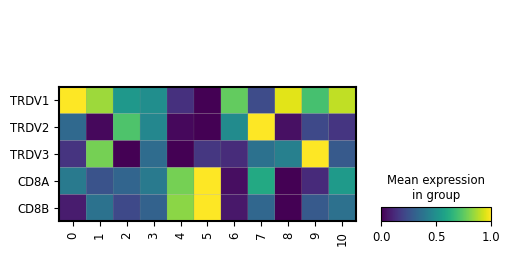

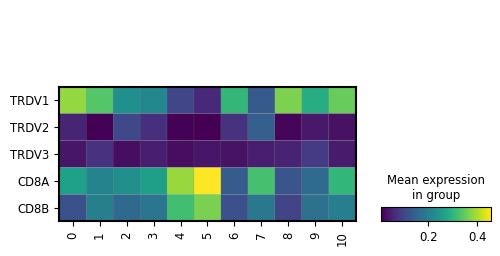

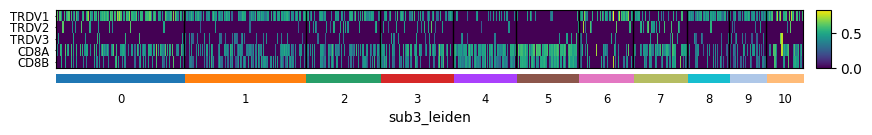

In [272]:
sc.pl.matrixplot(adata_joanito_TME_T_NK_subset_l7, var_names=['TRDV1', 'TRDV2', 'TRDV3', 'CD8A', 'CD8B',], groupby='sub3_leiden', standard_scale='var', swap_axes=True)
sc.pl.matrixplot(adata_joanito_TME_T_NK_subset_l7, var_names=['TRDV1', 'TRDV2', 'TRDV3', 'CD8A', 'CD8B',], groupby='sub3_leiden', swap_axes=True)

sc.pl.heatmap(adata_joanito_TME_T_NK_subset_l7, var_names=['TRDV1', 'TRDV2', 'TRDV3', 'CD8A', 'CD8B',], groupby='sub3_leiden', swap_axes=True)

In [273]:
for tup in adata_joanito_TME_T_NK_subset_l7[adata_joanito_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['6', '9', '10'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'
    
for tup in adata_joanito_TME_T_NK_subset_l7[adata_joanito_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['0', '1', '2', '3', '5', '7', '8'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Vδ1+ T'
    
for tup in adata_joanito_TME_T_NK_subset_l7[adata_joanito_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['4'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Vδ2+ T'
    
for tup in adata_joanito_TME_T_NK_subset_l7[adata_joanito_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['11'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

### leiden 10 → Mixture of CD8 and CD4

In [274]:
adata_joanito_TME_T_NK_l10 = adata_joanito_TME_T_NK[adata_joanito_TME_T_NK.obs['sub1_leiden'].isin(['10'])].copy()
adata_joanito_TME_T_NK_l10 = adata_joanito_TME_T_NK_l10.raw.to_adata()

temp = list()
for SampleID, edf in adata_joanito_TME_T_NK_l10.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'T'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_joanito_TME_T_NK_l10 = adata_joanito_TME_T_NK_l10[~(adata_joanito_TME_T_NK_l10.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_joanito_TME_T_NK_l10)
sc.pp.log1p(adata_joanito_TME_T_NK_l10)
sc.pp.highly_variable_genes(adata_joanito_TME_T_NK_l10, n_top_genes=2000, batch_key='SampleID')

adata_joanito_TME_T_NK_l10.raw = adata_joanito_TME_T_NK_l10.copy()
adata_joanito_TME_T_NK_l10 = adata_joanito_TME_T_NK_l10[:, adata_joanito_TME_T_NK_l10.var.highly_variable]

sc.pp.scale(adata_joanito_TME_T_NK_l10, max_value=10)
sc.tl.pca(adata_joanito_TME_T_NK_l10, svd_solver="arpack")

/tmp/ipykernel_252326/2132032500.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_joanito_TME_T_NK_l10.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [275]:
sc.pp.neighbors(adata_joanito_TME_T_NK_l10, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_joanito_TME_T_NK_l10, random_state=42)
sc.tl.leiden(adata_joanito_TME_T_NK_l10, resolution=0.5, key_added='sub2_leiden')

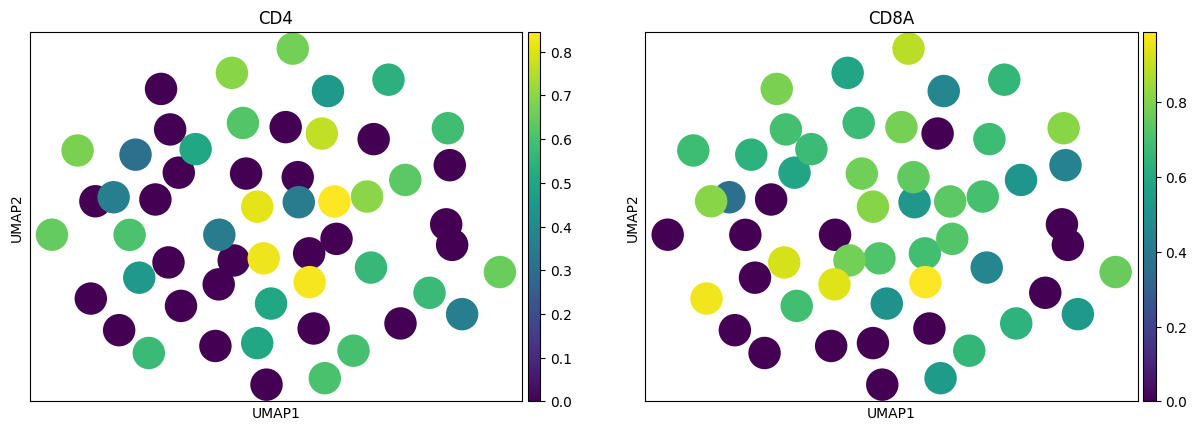

In [276]:
sc.pl.umap(adata_joanito_TME_T_NK_l10, color=['CD4', 'CD8A'])

In [277]:
for tup in adata_joanito_TME_T_NK_l10.obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

### Overview of T_NK cell results

In [278]:
adata_joanito_TME_T_NK.obs[~(adata_joanito_TME_T_NK.obs['Identifier'].isin(list(dict_Identifier_to_lvl_1_CellType.keys())))]

Empty DataFrame
Columns: [doublet_score, predicted_doublet, SampleID, PatientID, BiopsySite, n_genes_by_counts, log1p_n_genes_by_counts, total_counts, log1p_total_counts, pct_counts_in_top_50_genes, pct_counts_in_top_100_genes, pct_counts_in_top_200_genes, pct_counts_in_top_500_genes, total_counts_mt, log1p_total_counts_mt, pct_counts_mt, Identifier, Author_CellType_lvl_1, Author_CellType_lvl_2, n_genes, leiden, AvgSTRDiff, StdSTRDiff, NumSTRLoci, MSI, Manual_CellType_lvl_1, leiden_res_0.1, leiden_res_0.2, sub1_leiden]
Index: []

[0 rows x 29 columns]

In [285]:
adata_joanito_TME_T_NK.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType[Identifier] for Identifier in adata_joanito_TME_T_NK.obs['Identifier'] ]
adata_joanito_TME_T_NK.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType[Identifier] for Identifier in adata_joanito_TME_T_NK.obs['Identifier'] ]

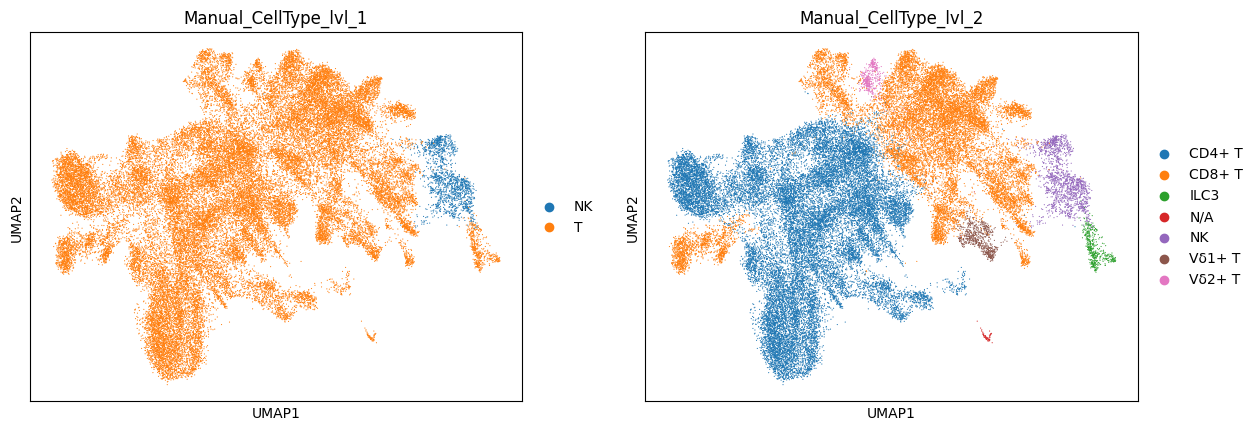

In [286]:
sc.pl.umap(adata_joanito_TME_T_NK, color=['Manual_CellType_lvl_1', 'Manual_CellType_lvl_2'])

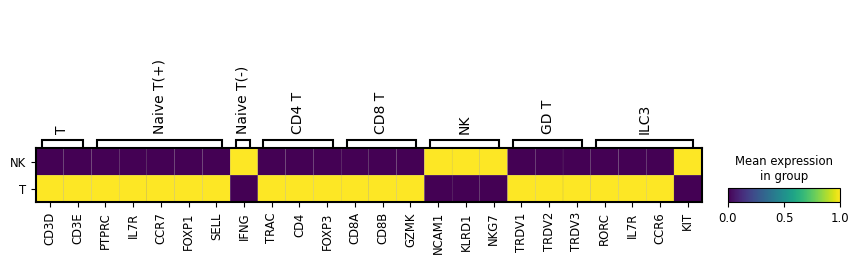

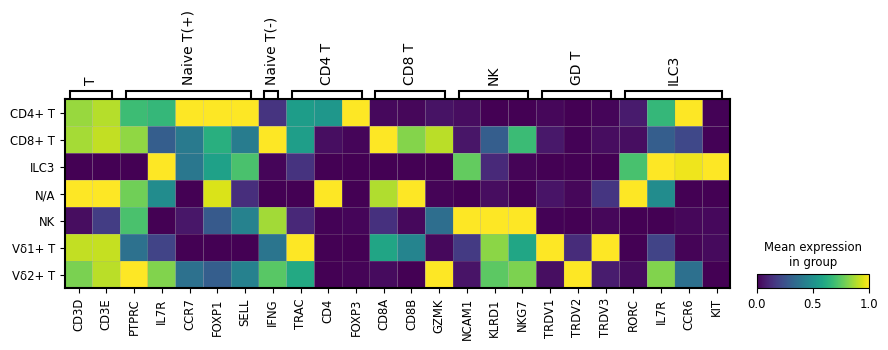

In [287]:
sc.pl.matrixplot(adata_joanito_TME_T_NK, var_names=T_markers, groupby='Manual_CellType_lvl_1', standard_scale='var')
sc.pl.matrixplot(adata_joanito_TME_T_NK, var_names=T_markers, groupby='Manual_CellType_lvl_2', standard_scale='var')

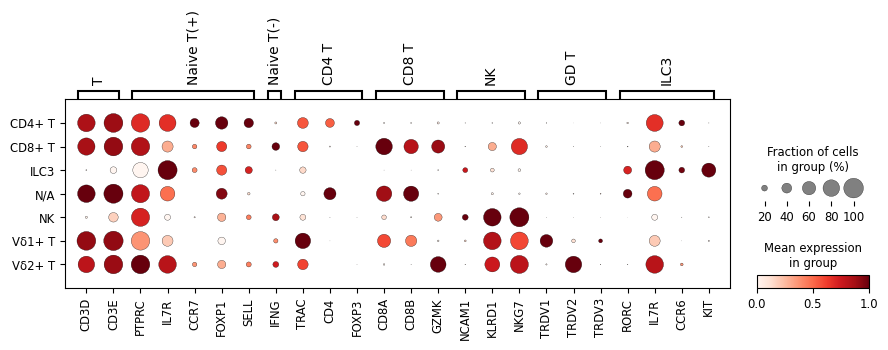

In [288]:
sc.pl.dotplot(adata_joanito_TME_T_NK, var_names=T_markers, groupby='Manual_CellType_lvl_2', standard_scale='var')

In [289]:
saveWithPickle(dict_Identifier_to_lvl_1_CellType, '/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType', 'B_and_T.lvl1')
saveWithPickle(dict_Identifier_to_lvl_2_CellType, '/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType', 'B_and_T.lvl2')
raise ValueError

ValueError: 

<Axes: xlabel='count', ylabel='PatientID'>

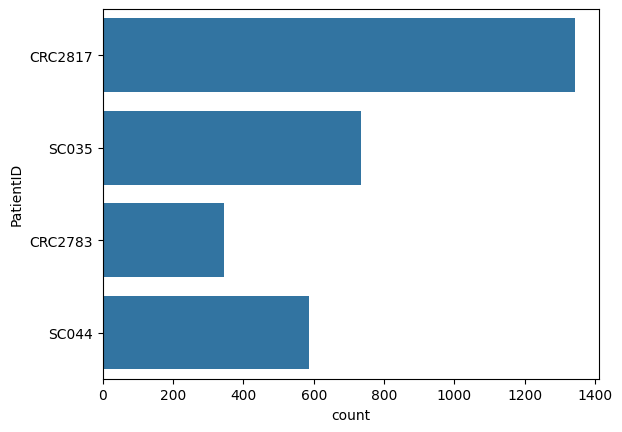

In [ ]:
sns.countplot(data=adata_joanito_TME_T_NK.obs[(adata_joanito_TME_T_NK.obs['Manual_CellType_lvl_2']=='CD8+ T') & (adata_joanito_TME_T_NK.obs['BiopsySite'].isin(['Tumor', 'Core']))], y='PatientID', order=['CRC2817', 'SC035', 'CRC2783', 'SC044'])

In [ ]:
adata_temp = adata_joanito_TME_T_NK[(adata_joanito_TME_T_NK.obs['Manual_CellType_lvl_2']=='CD8+ T') & 
                                     (adata_joanito_TME_T_NK.obs['MSI']=='MSI-H') & 
                                     (adata_joanito_TME_T_NK.obs['BiopsySite'].isin(['Core', 'Tumor']))].copy()

In [ ]:
sc.tl.rank_genes_groups(adata_temp, groupby='PatientID', method='logreg')

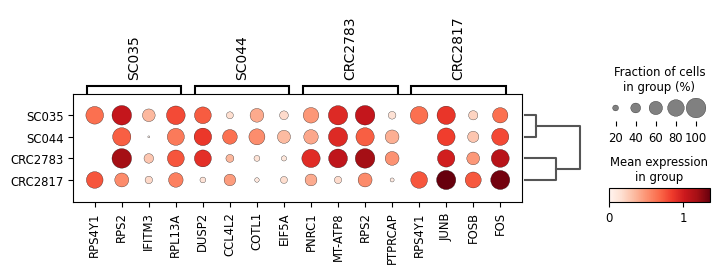

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_temp, groupby='PatientID', n_genes=3)

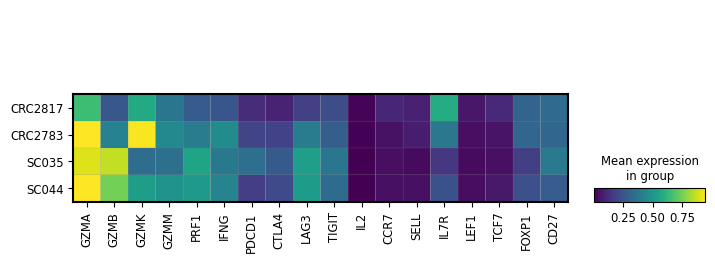

In [ ]:
sc.pl.matrixplot(adata_joanito_TME_T_NK[(adata_joanito_TME_T_NK.obs['Manual_CellType_lvl_2']=='CD8+ T') & 
                                     (adata_joanito_TME_T_NK.obs['MSI']=='MSI-H') & 
                                     (adata_joanito_TME_T_NK.obs['BiopsySite'].isin(['Core', 'Tumor']))], 
              var_names=['GZMA', 'GZMB', 'GZMK', 'GZMM', 'PRF1', 'IFNG', 
                         'PDCD1', 'CTLA4', 'LAG3', 'TIGIT', 
                         # 'JUNB', 'JUN', 'FOS', 
                         'IL2',
                         'CCR7', 'SELL', 'IL7R', 'LEF1', 'TCF7', 'FOXP1', 'CD27'], 
              
              groupby='PatientID', categories_order=['CRC2817', "CRC2783", 'SC035', 'SC044'],
            #   standard_scale='var',
              )

In [ ]:
sc.tl.score_genes(adata_temp, ['GZMA', 'GZMB', 'GZMK', 'GZMM', 'PRF1'], score_name='cytotoxic_activity')
sc.tl.score_genes(adata_temp, ['CCR7', 'SELL', 'IL7R', 'LEF1', 'TCF7'], score_name='naive_score')

<Axes: xlabel='PatientID', ylabel='naive_score'>

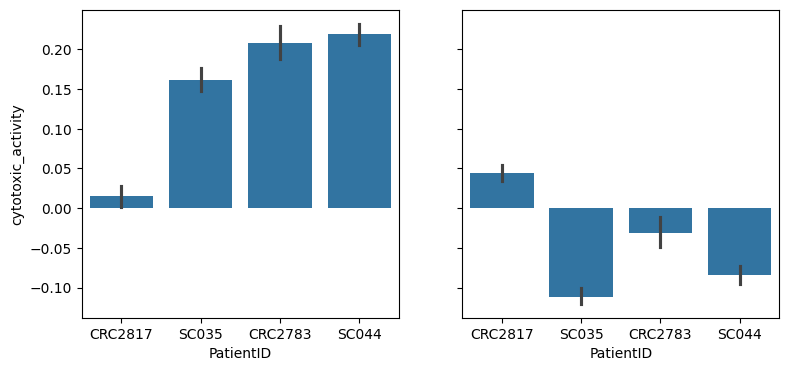

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)
sns.barplot(adata_temp.obs, y='cytotoxic_activity', x='PatientID', order=['CRC2817', 'SC035', 'CRC2783', 'SC044'], ax=axes[0])
sns.barplot(adata_temp.obs, y='naive_score', x='PatientID', order=['CRC2817', 'SC035', 'CRC2783', 'SC044'], ax=axes[1])

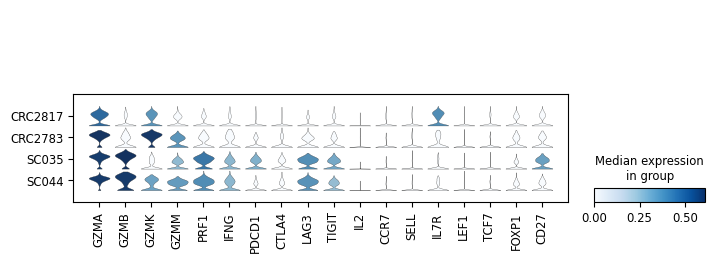

In [ ]:
sc.pl.stacked_violin(adata_joanito_TME_T_NK[(adata_joanito_TME_T_NK.obs['Manual_CellType_lvl_2']=='CD8+ T') & 
                                     (adata_joanito_TME_T_NK.obs['MSI']=='MSI-H') & 
                                     (adata_joanito_TME_T_NK.obs['BiopsySite'].isin(['Core', 'Tumor']))], 
              var_names=['GZMA', 'GZMB', 'GZMK', 'GZMM', 'PRF1', 'IFNG', 
                         'PDCD1', 'CTLA4', 'LAG3', 'TIGIT', 
                         # 'JUNB', 'JUN', 'FOS', 
                         'IL2',
                         'CCR7', 'SELL', 'IL7R', 'LEF1', 'TCF7', 'FOXP1', 'CD27'], 
              
              groupby='PatientID', categories_order=['CRC2817', "CRC2783", 'SC035', 'SC044'],
              standard_scale='var',
              )